# Project Outline

- We have to scrape data from 
- url = https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off
- We need to have name, price, ratings, reviews

In [2]:
# on the course of this project, we will use these required libraries
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [4]:
#let us import URL and request data
url = 'https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'

page = requests.get(url)
#status code is necessary to check if its succesfull
page.status_code

200

In [30]:
#
main_class = '_3pLy-c row'
main_data = soup.find_all('div', class_=main_class)

In [31]:
len(main_data)

24

In [37]:
data1 = main_data[0]

In [41]:
data1

<div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">REDMI 10 (Pacific Blue, 64 GB)</div><div class="gUuXy-"><span class="_1lRcqv" id="productRating_LSTMOBGC9GYCHQZK9GWAF1RPC_MOBGC9GYCHQZK9GW_"><div class="_3LWZlK">4.3</div></span><span class="_2_R_DZ"><span><span>1,92,505 Ratings </span><span class="_13vcmD">&amp;</span><span> 12,418 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">4 GB RAM | 64 GB ROM | Expandable Upto 1 TB</li><li class="rgWa7D">17.02 cm (6.7 inch) HD+ Display</li><li class="rgWa7D">50MP + 2MP | 5MP Front Camera</li><li class="rgWa7D">6000 mAh Lithium Polymer Battery</li><li class="rgWa7D">Qualcomm Snapdragon 680 Processor</li><li class="rgWa7D">1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹9,299</div><div class="_3I9_wc _27UcVY">₹<!-- -->14,999</div><div 

In [38]:
#we will find the data for 1st element, based on their class and using find. We use strip function as well
title = data1.find('div', class_='_4rR01T').text.strip()
discounted_price = data1.find('div', class_='_30jeq3 _1_WHN1').text.strip()
rating = data1.find('span', class_='_2_R_DZ').text.strip()
star = data1.find('div', class_='_3LWZlK').text.strip()
price_before_discount = data1.find('div', class_='_3I9_wc _27UcVY').text.strip()

In [40]:
print(title,discounted_price,rating,star,price_before_discount)

REDMI 10 (Pacific Blue, 64 GB) ₹9,299 1,92,505 Ratings & 12,418 Reviews 4.3 ₹14,999


In [64]:
#create an empty list to store data at end
phone_data = []

for data in main_data:
    #create a local empty dictionary
    temp_dict={}
    temp_dict['title'] = data.find('div', class_='_4rR01T').text.strip()
    
    #we need to remove ‘₹’ symbol from the price column we used text. 
    #Replace command to remove that symbol from column.
    temp_dict['discounted_price'] = data.find('div', class_='_30jeq3 _1_WHN1').text.replace('₹','').strip()
    
    rating_element = data.find('span', class_='_2_R_DZ')
    if rating_element is not None:
        temp_dict['rating'] = rating_element.text.strip()
    else:
        temp_dict['rating'] = None
        
    star_element = data.find('div', class_='_3LWZlK')
    if star_element is not None:
        temp_dict['stars'] = star_element.text.strip()
    else:
        temp_dict['stars'] = None
        
    temp_dict['price_before_discount'] = data.find('div', class_='_3I9_wc _27UcVY').text.replace('₹', '').strip()
    
   #appending all data to the list created
    phone_data.append(temp_dict)

# Data Cleaning

In [65]:
phone_df = pd.DataFrame(phone_data)

In [66]:
phone_df.dropna(inplace=True)

In [67]:
# Split 'rating' column based on '&' character and create separate columns for each part of the rating
phone_df[['ratings', 'reviews']] = phone_df['rating'].str.split('&', expand=True).apply(lambda x: x.str.strip())

# Remove non-numeric characters (including commas) from the rating columns
phone_df['ratings'] = phone_df['ratings'].apply(lambda x: int(''.join(filter(str.isdigit, x))))
phone_df['reviews'] = phone_df['reviews'].apply(lambda x: int(''.join(filter(str.isdigit, x))))

# Drop the original 'rating' column
phone_df.drop('rating', axis=1, inplace=True)

# Print the updated DataFrame
print(phone_df)


                                           title discounted_price stars  \
0                 REDMI 10 (Pacific Blue, 64 GB)            9,299   4.3   
1              REDMI 10 (Caribbean Green, 64 GB)            9,299   4.3   
3               REDMI 10 (Midnight Black, 64 GB)            9,299   4.3   
4         Infinix HOT 20 Play (Luna Blue, 64 GB)            8,199   4.4   
5      Infinix HOT 20 Play (Racing Black, 64 GB)            8,199   4.4   
6    Infinix HOT 20 Play (Fantasy Purple, 64 GB)            8,199   4.4   
7      Infinix HOT 20 Play (Aurora Green, 64 GB)            8,199   4.4   
8      SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)           14,999   4.3   
9               REDMI 10 (Sunrise Orange, 64 GB)            9,299   4.3   
10  SAMSUNG Galaxy F23 5G (Copper Blush, 128 GB)           14,999   4.3   
11                  POCO C50 (Royal Blue, 32 GB)            5,749   4.4   
12               POCO C50 (Country Green, 32 GB)            5,749   4.4   
13           MOTOROLA g52

In [68]:
phone_df.head()

,title,discounted_price,stars,price_before_discount,ratings,reviews
0,"REDMI 10 (Pacific Blue, 64 GB)","9,299",4.3,"14,999",192505,12418
1,"REDMI 10 (Caribbean Green, 64 GB)","9,299",4.3,"14,999",192505,12418
3,"REDMI 10 (Midnight Black, 64 GB)","9,299",4.3,"14,999",192505,12418
4,"Infinix HOT 20 Play (Luna Blue, 64 GB)","8,199",4.4,"11,999",10306,605
5,"Infinix HOT 20 Play (Racing Black, 64 GB)","8,199",4.4,"11,999",10306,605


In [71]:
#removing commas in the columns, and converting them to integers

phone_df['discounted_price'] = phone_df['discounted_price'].astype(str).apply(lambda x: int(''.join(filter(str.isdigit, x))))
phone_df['price_before_discount'] = phone_df['price_before_discount'].astype(str).apply(lambda x: int(''.join(filter(str.isdigit, x))))


In [75]:
#converting stars into float type
phone_df['stars'] = phone_df['stars'].astype(float)

In [81]:
phone_df.dtypes

title                     object
discounted_price           int64
stars                    float64
price_before_discount      int64
ratings                    int64
reviews                    int64
dtype: object

In [76]:
phone_df.head()

,title,discounted_price,stars,price_before_discount,ratings,reviews
0,"REDMI 10 (Pacific Blue, 64 GB)",9299,4.3,14999,192505,12418
1,"REDMI 10 (Caribbean Green, 64 GB)",9299,4.3,14999,192505,12418
3,"REDMI 10 (Midnight Black, 64 GB)",9299,4.3,14999,192505,12418
4,"Infinix HOT 20 Play (Luna Blue, 64 GB)",8199,4.4,11999,10306,605
5,"Infinix HOT 20 Play (Racing Black, 64 GB)",8199,4.4,11999,10306,605


# Data Analysis

In [78]:
import numpy as np

### finding out mobile phones which have 4.3 stars and discounted price less than 9000

In [85]:
phone_df[(phone_df['stars'] >= 4.3) & (phone_df['discounted_price'] <= 9000)]


,title,discounted_price,stars,price_before_discount,ratings,reviews
4,"Infinix HOT 20 Play (Luna Blue, 64 GB)",8199,4.4,11999,10306,605
5,"Infinix HOT 20 Play (Racing Black, 64 GB)",8199,4.4,11999,10306,605
6,"Infinix HOT 20 Play (Fantasy Purple, 64 GB)",8199,4.4,11999,10306,605
7,"Infinix HOT 20 Play (Aurora Green, 64 GB)",8199,4.4,11999,10306,605
11,"POCO C50 (Royal Blue, 32 GB)",5749,4.4,8999,3007,148
12,"POCO C50 (Country Green, 32 GB)",5749,4.4,8999,3007,148
17,"Infinix Hot 12 (7° Purple, 64 GB)",8499,4.3,12999,19757,1402
18,"Infinix Hot 12 (Exploratory Blue, 64 GB)",8499,4.3,12999,19757,1402
21,"Infinix Smart 6 HD (Origin Blue, 32 GB)",5799,4.4,8999,24340,1365
22,"Infinix Smart 6 HD (Aqua Sky, 32 GB)",5799,4.4,8999,24340,1365


We have 11 products which are in buying range and have good star

### Data Visualising

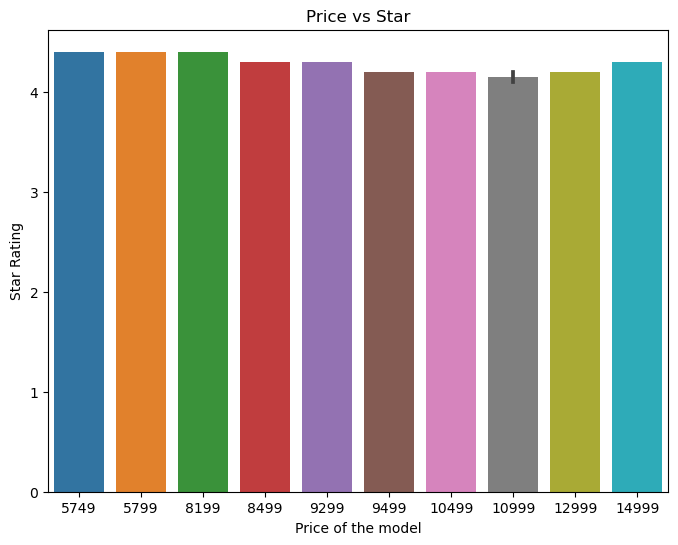

In [87]:
plt.figure(figsize=(8,6))
sns.barplot(x=phone_df['discounted_price'], y=phone_df['stars'])
plt.xlabel('Price of the model')
plt.ylabel('Star Rating')
plt.title('Price vs Star')
plt.show()

We can conclude, Stars rating doesnt depend on Price

In [89]:
phone_df['title'].unique()

array(['REDMI 10 (Pacific Blue, 64 GB)',
       'REDMI 10 (Caribbean Green, 64 GB)',
       'REDMI 10 (Midnight Black, 64 GB)',
       'Infinix HOT 20 Play (Luna Blue, 64 GB)',
       'Infinix HOT 20 Play (Racing Black, 64 GB)',
       'Infinix HOT 20 Play (Fantasy Purple, 64 GB)',
       'Infinix HOT 20 Play (Aurora Green, 64 GB)',
       'SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)',
       'REDMI 10 (Sunrise Orange, 64 GB)',
       'SAMSUNG Galaxy F23 5G (Copper Blush, 128 GB)',
       'POCO C50 (Royal Blue, 32 GB)', 'POCO C50 (Country Green, 32 GB)',
       'MOTOROLA g52 (Charcoal Grey, 64 GB)',
       'MOTOROLA g31 (Baby Blue, 128 GB)',
       'MOTOROLA g52 (Metallic White, 128 GB)',
       'MOTOROLA g52 (Charcoal Grey, 128 GB)',
       'Infinix Hot 12 (7° Purple, 64 GB)',
       'Infinix Hot 12 (Exploratory Blue, 64 GB)',
       'MOTOROLA g31 (Meteorite Grey, 64 GB)',
       'MOTOROLA G32 (Mineral Gray, 64 GB)',
       'Infinix Smart 6 HD (Origin Blue, 32 GB)',
       'Infinix Smar

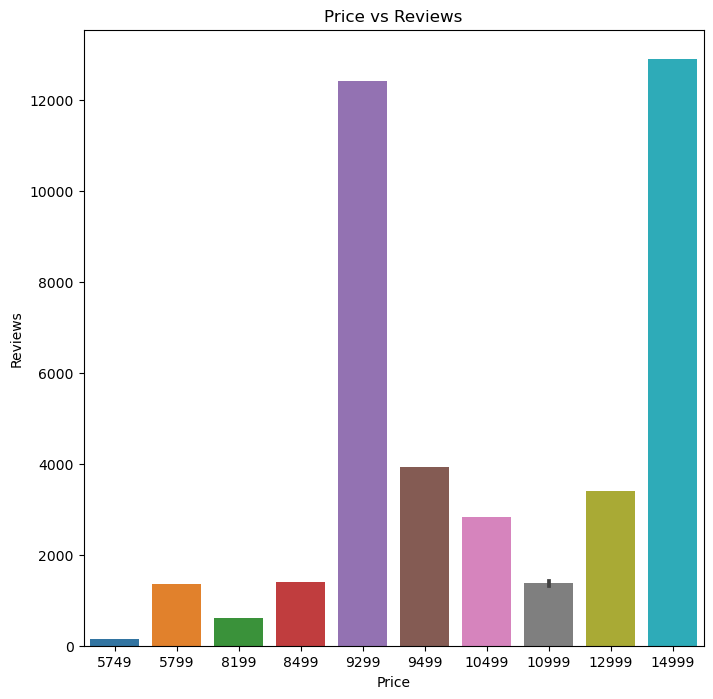

In [95]:
plt.figure(figsize=(8,8))
sns.barplot(x=phone_df['discounted_price'], y=phone_df['reviews'])
plt.xlabel('Price')
plt.ylabel('Reviews')
plt.title('Price vs Reviews')
plt.show()


Price and reviews have not much dependency on each other

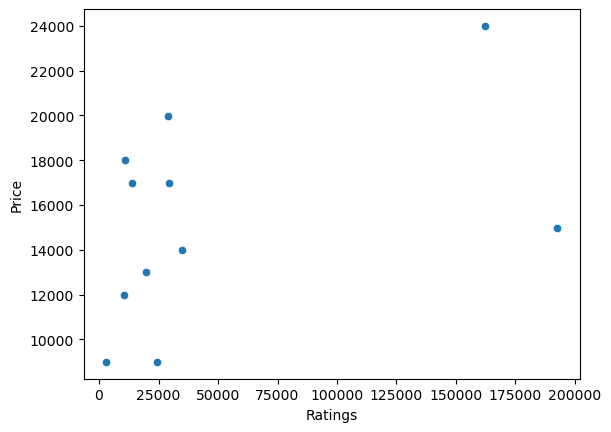

In [100]:
sns.scatterplot(x=phone_df['ratings'], y=phone_df['price_before_discount'])
plt.xlabel('Ratings')
plt.ylabel('Price')
plt.show()

From Above, we can observe higher prices have higher ratings